In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

%matplotlib inline

In [2]:
# load our data from csv and split into x_train and y_train
x_train = pd.read_csv('Dataset/twitter.csv')
x_train = x_train[['neurate','posrate','negrate']]
x_train = x_train.values
print(x_train.shape)
y_train = pd.read_csv('Dataset/twitter.csv')
y_train = y_train[['increaserange']]
y_train = y_train.values
y_train = y_train.reshape(25,)
print(y_train)

(25, 3)
[3 2 2 1 2 3 4 4 3 2 1 2 3 4 4 3 2 1 1 3 3 3 2 0 0]


Epoch 1/50
13/13 [==============================] - 0s 2ms/step - loss: 1.6148 - accuracy: 0.1600
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 1.5980 - accuracy: 0.1600
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 1.5863 - accuracy: 0.2800
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 1.5766 - accuracy: 0.3200
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 1.5694 - accuracy: 0.3200
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 1.5589 - accuracy: 0.3200
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 1.5537 - accuracy: 0.3200
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 1.5486 - accuracy: 0.3200
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 1.5459 - accuracy: 0.3200
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 1.5402 - accuracy: 0.3200
Epoch 11/50
13/13 [

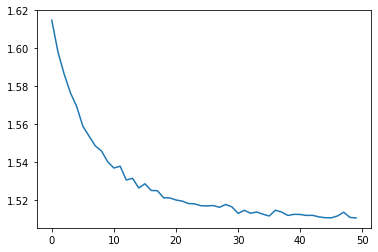

In [6]:
# define NN, apply softmax for output layer (multi-classification)
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# use sparse categorical crossentropy can avoid use onehot encoding.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
# use adam for gradient descent
optimizer = tf.keras.optimizers.Adam()
# compile model with configurations above
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])
# fit our model with epochs of 50 (too hard to get reliable data...) 
history = model.fit(x_train,y_train,epochs=50,batch_size=2)
print(history.history.keys())
plt.plot(history.history['loss'])
plt.savefig('loss.png')

#model.save('twitter_analysis.h5')

model.summary()
result = model.predict(x_train)
# this will print a 5-column list, and each colunm is the probability that this input belongs to.
print(result[19])
# take a look for a classification result (class number reference is in README)
for i in range(19,20):
    k = np.argmax(result[i])
    print("This should be classified in to class ",k+1)